In [1]:
from google.colab import drive
drive.mount("/content/googledrive")
%cd /content/googledrive/My Drive/data_mining_prac/

Mounted at /content/googledrive
/content/googledrive/My Drive/data_mining_prac


In [ ]:
!pwd
!ls

/content/googledrive/My Drive/data_mining_prac
'dm02_jma_csv_analysis.ipynb のコピー'	 temp_data   データマイニング演習課題1.ipynb


In [2]:
import os
import glob
import pandas as pd

place=["saitama","sapporo","niigata","tajimi","osaka","hukuoka"]
data=dict.fromkeys(place)
dir_name="temp_data"
filename=glob.glob("*.csv",root_dir=dir_name)
for f in filename:
  print(f)

osaka_data.csv
hukuoka_data.csv
niigata_data.csv
sapporo_data.csv
tajimi_data.csv
saitama_data.csv


In [3]:
for key in place:
  path=os.path.join(dir_name,key+"_data.csv")
  data[key]=pd.read_csv(path,header=0,skiprows=4,names=["date","temperature"],usecols=[0,1],encoding='shift-jis')
  data[key]["date"]=pd.to_datetime(data[key]["date"])

In [ ]:
print(data["saitama"])
print("data typr:{}".format(data["saitama"].dtypes))

                    date  temperature
0    2022-10-13 01:00:00         16.0
1    2022-10-13 02:00:00         15.8
2    2022-10-13 03:00:00         15.7
3    2022-10-13 04:00:00         15.7
4    2022-10-13 05:00:00         15.6
...                  ...          ...
8779 2023-10-13 20:00:00         17.2
8780 2023-10-13 21:00:00         16.2
8781 2023-10-13 22:00:00         14.7
8782 2023-10-13 23:00:00         13.5
8783 2023-10-14 00:00:00         13.1

[8784 rows x 2 columns]
data typr:date           datetime64[ns]
temperature           float64
dtype: object


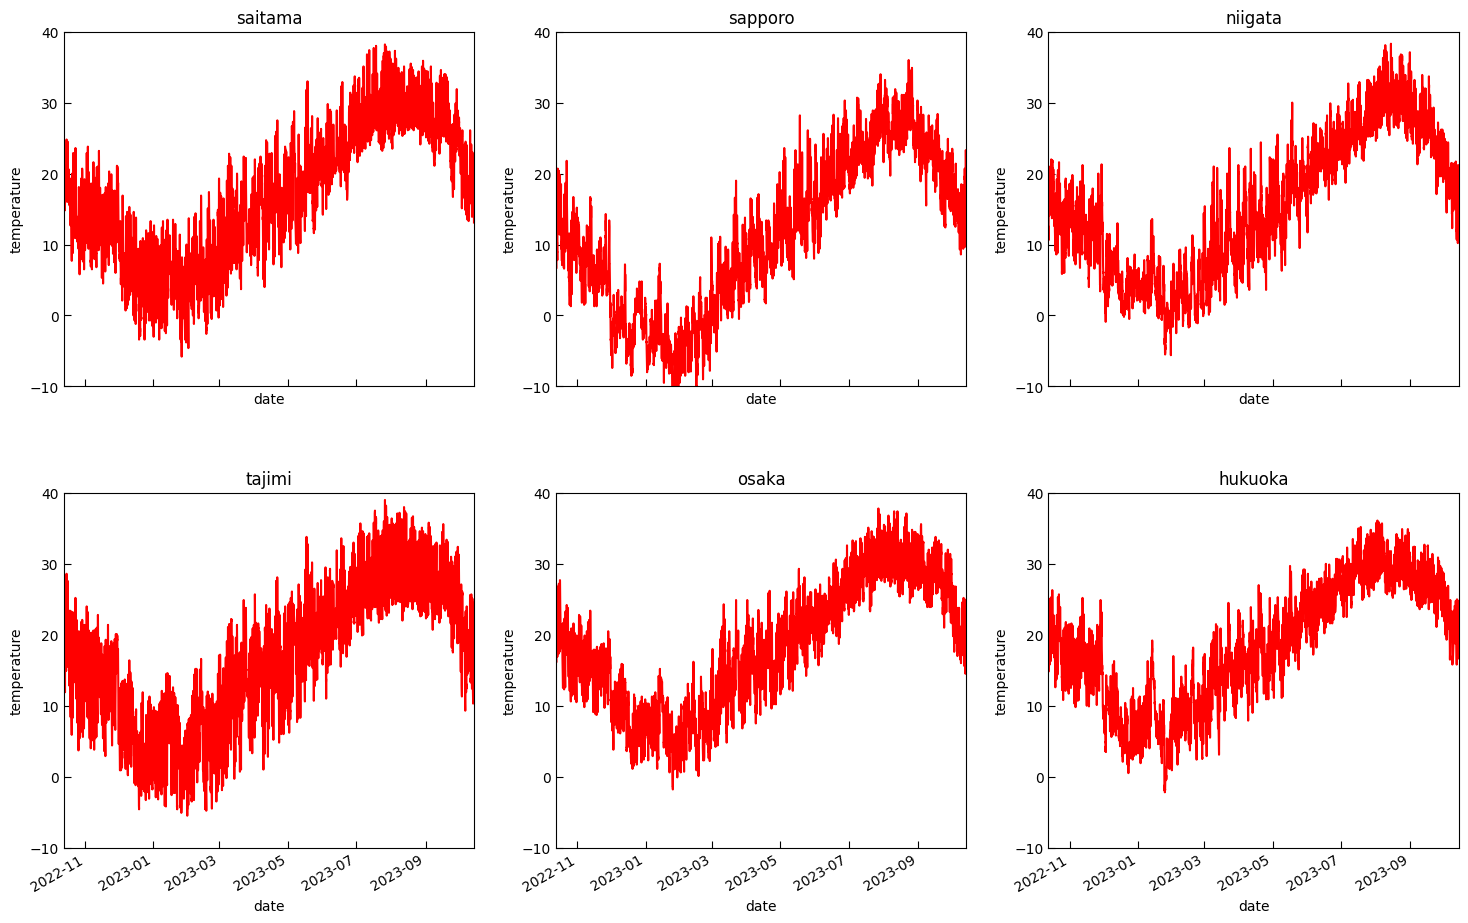

In [4]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig,axs=plt.subplots(2,3,figsize=(18,12))
axs=axs.reshape(-1)
span=[data["saitama"].at[0,"date"],data["saitama"].at[8783,"date"]]
fig.autofmt_xdate()
daysFmt = mdates.DateFormatter('%Y-%m-%d')
for name,ax in zip(place,axs):
  ax.plot(data[name]["date"],data[name]["temperature"],color='r')
  ax.set_title(name)
  ax.set_xlim(span)
  ax.set_ylim(-10,40)
  ax.set_xlabel("date")
  ax.set_ylabel("temperature")
  ax.tick_params(axis='both',direction = "in", length = 5)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [63]:
count_date=dict.fromkeys([11,12,1,2,3,4,5,6,7,8,9,10],0)
print(count_date)

{11: 0, 12: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}


In [62]:
count_date=dict.fromkeys([11,12,1,2,3,4,5,6,7,8,9,10],0)
del_index=[]
for i in data['saitama'].index:
  if (data['saitama'].at[i,"date"].strftime('%Y-%m')=="2022-10"):
    del_index.append(i)
for key in place:
  data[key]=data[key].drop(del_index)
  data[key]=data[key].reset_index()

print(data['saitama'])

ValueError: ignored

In [64]:
dates=[np.datetime64("2022-11"),
       np.datetime64("2022-12"),
       np.datetime64("2023-01"),
       np.datetime64("2023-02"),
       np.datetime64("2023-03"),
       np.datetime64("2023-04"),
       np.datetime64("2023-05"),
       np.datetime64("2023-06"),
       np.datetime64("2023-07"),
       np.datetime64("2023-08"),
       np.datetime64("2023-09"),
       np.datetime64("2023-10"),
       ]
print(dates)

[numpy.datetime64('2022-11'), numpy.datetime64('2022-12'), numpy.datetime64('2023-01'), numpy.datetime64('2023-02'), numpy.datetime64('2023-03'), numpy.datetime64('2023-04'), numpy.datetime64('2023-05'), numpy.datetime64('2023-06'), numpy.datetime64('2023-07'), numpy.datetime64('2023-08'), numpy.datetime64('2023-09'), numpy.datetime64('2023-10')]


In [65]:
temperature=dict.fromkeys(place)
for key in place:
  for i in data[key].index:
    if data[key].at[i,"temperature"]>=35.0:
      count_date[data[key].at[i,"date"].month]+=1
  df=pd.DataFrame(data=count_date.values(),
                  index=count_date.keys(),
                  columns=["over34"])
  df["month"]=dates
  df["month"]=pd.to_datetime(df["month"])
  temperature[key]=df
  count_date = {k: 0 for k in count_date.keys()}
print(temperature["tajimi"])

    over34      month
11       0 2022-11-01
12       0 2022-12-01
1        0 2023-01-01
2        0 2023-02-01
3        0 2023-03-01
4        0 2023-04-01
5        0 2023-05-01
6        0 2023-06-01
7       41 2023-07-01
8       54 2023-08-01
9        8 2023-09-01
10       0 2023-10-01


In [58]:
print(data["saitama"].at[6228,"temperature"])
print(data["saitama"].at[6228,"date"].month)

35.0
7


In [66]:
print(temperature)

{'saitama':     over34      month
11       0 2022-11-01
12       0 2022-12-01
1        0 2023-01-01
2        0 2023-02-01
3        0 2023-03-01
4        0 2023-04-01
5        0 2023-05-01
6        0 2023-06-01
7       75 2023-07-01
8       20 2023-08-01
9        1 2023-09-01
10       0 2023-10-01, 'sapporo':     over34      month
11       0 2022-11-01
12       0 2022-12-01
1        0 2023-01-01
2        0 2023-02-01
3        0 2023-03-01
4        0 2023-04-01
5        0 2023-05-01
6        0 2023-06-01
7        0 2023-07-01
8        3 2023-08-01
9        0 2023-09-01
10       0 2023-10-01, 'niigata':     over34      month
11       0 2022-11-01
12       0 2022-12-01
1        0 2023-01-01
2        0 2023-02-01
3        0 2023-03-01
4        0 2023-04-01
5        0 2023-05-01
6        0 2023-06-01
7        0 2023-07-01
8       58 2023-08-01
9        0 2023-09-01
10       0 2023-10-01, 'tajimi':     over34      month
11       0 2022-11-01
12       0 2022-12-01
1        0 2023-01-01
2      

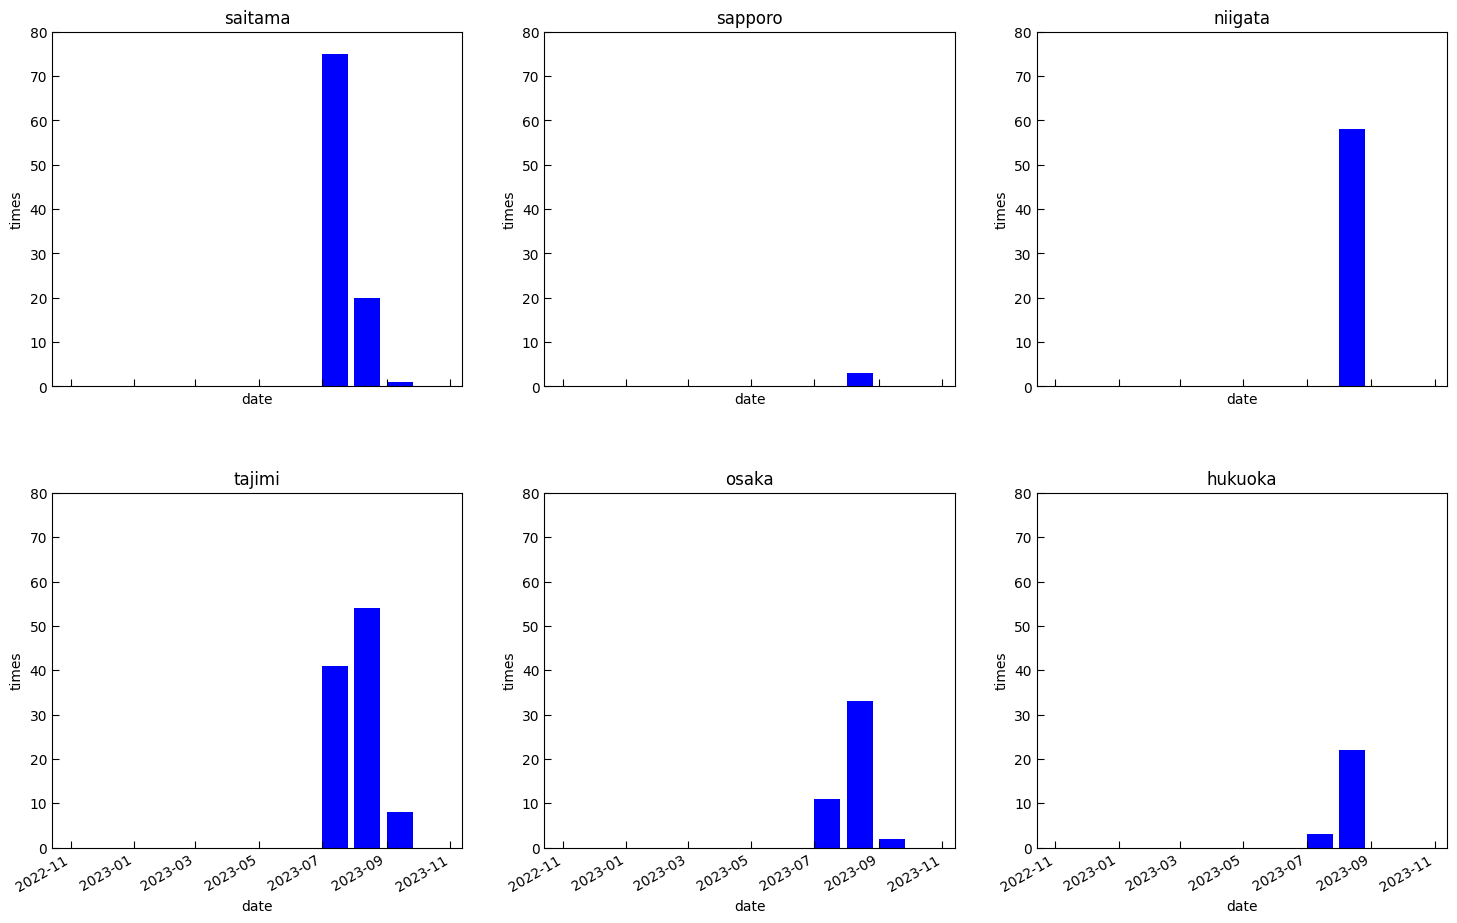

In [67]:
fig,axs=plt.subplots(2,3,figsize=(18,12))
axs=axs.reshape(-1)
span=[np.datetime64("2022-11"),np.datetime64("2023-10")]
fig.autofmt_xdate()
daysFmt = mdates.DateFormatter('%Y-%m')
for name,ax in zip(place,axs):
  ax.bar(x=temperature[name]["month"],height=temperature[name]["over34"],width=25.0,color='blue',align="edge")
  ax.set_title(name)
  ax.set_ylim(0,80)
  ax.set_xlabel("date")
  ax.set_ylabel("times")
  ax.tick_params(axis='both',direction = "in", length = 5)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

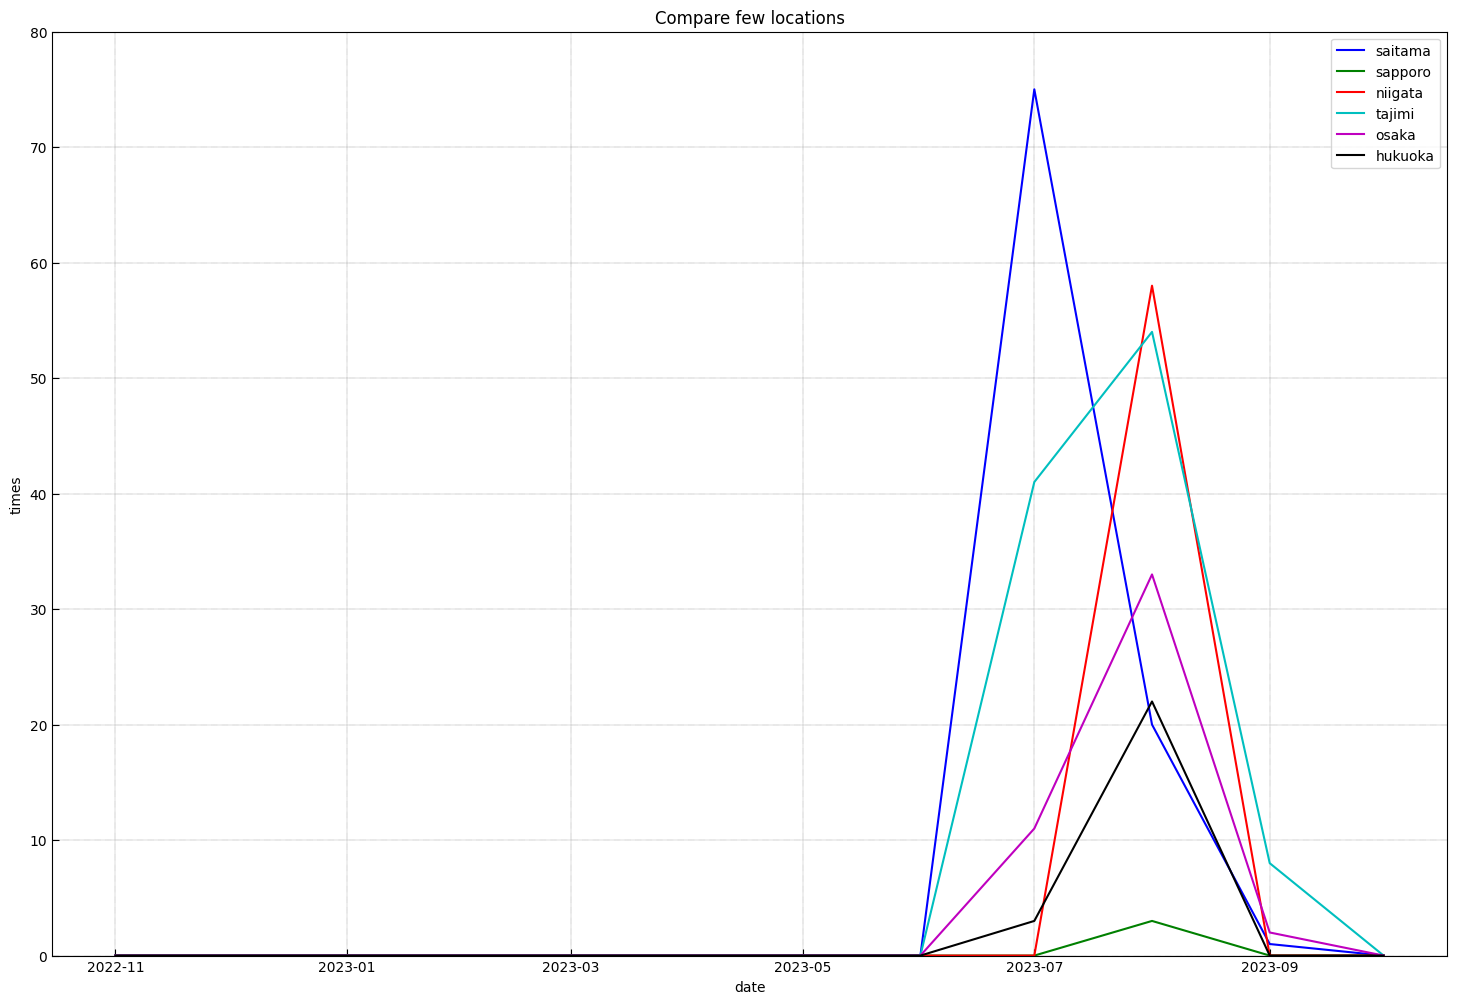

In [69]:
fig2=plt.figure(figsize=(18,12))
ax1=fig2.add_subplot(111)
color=['b','g','r','c','m','k']
for name,c in zip(place,color):
  ax1.plot(temperature[name]["month"],temperature[name]["over34"],color=c,label=name)
ax1.set_title("Compare few locations")
ax1.set_ylim(0,80)
ax1.set_xlabel("date")
ax1.set_ylabel("times")
ax1.tick_params(axis='both',direction = "in", length = 5)

plt.grid(color='k', linestyle=':', linewidth=0.3)
plt.legend()
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()